In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import  mean_absolute_error,mean_squared_error, r2_score

In [9]:
df = pd.read_csv(r"F:\aws.csv", encoding="ISO-8859-1", parse_dates=["TIME(UTC)"])
df

C:\Users\karan\AppData\Local\Temp\ipykernel_59220\3240072468.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"F:\aws.csv", encoding="ISO-8859-1", parse_dates=["TIME(UTC)"])


,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),...,SOIL_MOIS_10cm(m3/m3),SOIL_TEMP_30cm(C),SOIL_MOIS_30cm(m3/m3),SOIL_TEMP_70cm(C),SOIL_MOIS_70cm(m3/m3),SOIL_TEMP_100cm(C),SOIL_MOIS_100cm(m3/m3),GLOBAL_RADIATION(v/m2),PAR(micro-mole/m2s),Unnamed: 30
0,2020-01-01,2025-04-28 00:00:00,0.0,0.0,0.5,0.0,1.2,NaN,-3.6,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,2025-04-28 00:15:00,0.0,0.0,0.8,0.0,1.7,NaN,-3.3,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,2025-04-28 00:30:00,0.0,0.0,1.0,0.0,1.7,NaN,-3.1,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,2025-04-28 00:45:00,0.0,0.0,1.3,1.2,1.3,NaN,-2.7,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,2025-04-28 01:00:00,0.0,0.0,1.5,1.2,1.7,NaN,-2.8,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150778,2024-12-31,2025-04-28 22:45:00,0.0,0.0,4.1,3.7,4.1,NaN,4.1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150779,2024-12-31,2025-04-28 23:00:00,0.0,0.0,3.4,3.2,4.2,NaN,3.4,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150780,2024-12-31,2025-04-28 23:15:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150781,2024-12-31,2025-04-28 23:30:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.drop(columns=["RH_MIN_MAX_DAY(%)","WIND_MAX/GUST_10m(kt)","WIND_DIR_3m(deg)","WIND_SPEED_3m(kt)","WIND_MAX/GUST_3m(kt)","SOIL_TEMP_10cm(C)","SOIL_MOIS_10cm(m3/m3)","SOIL_TEMP_30cm(C)","SOIL_MOIS_30cm(m3/m3)","SOIL_TEMP_70cm(C)","SOIL_MOIS_70cm(m3/m3)","SOIL_TEMP_100cm(C)","SOIL_MOIS_100cm(m3/m3)","GLOBAL_RADIATION(v/m2)","PAR(micro-mole/m2s)"])
df
                

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM),Unnamed: 30
0,2020-01-01,2025-04-28 00:00:00,0.0,0.0,0.5,0.0,1.2,NaN,-3.6,74.0,93,2,873.8,1618.2,00:00,NaN
1,2020-01-01,2025-04-28 00:15:00,0.0,0.0,0.8,0.0,1.7,NaN,-3.3,74.0,89,3,874.0,1615.4,00:00,NaN
2,2020-01-01,2025-04-28 00:30:00,0.0,0.0,1.0,0.0,1.7,NaN,-3.1,74.0,276,1,874.3,1613.5,00:00,NaN
3,2020-01-01,2025-04-28 00:45:00,0.0,0.0,1.3,1.2,1.3,NaN,-2.7,75.0,97,1,874.4,1610.7,00:00,NaN
4,2020-01-01,2025-04-28 01:00:00,0.0,0.0,1.5,1.2,1.7,NaN,-2.8,73.0,118,2,874.6,1608.8,00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150778,2024-12-31,2025-04-28 22:45:00,0.0,0.0,4.1,3.7,4.1,NaN,4.1,100.0,83,2,NaN,NaN,02:43,NaN
150779,2024-12-31,2025-04-28 23:00:00,0.0,0.0,3.4,3.2,4.2,NaN,3.4,100.0,1,1,NaN,NaN,02:58,NaN
150780,2024-12-31,2025-04-28 23:15:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,359,0,NaN,NaN,03:13,NaN
150781,2024-12-31,2025-04-28 23:30:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,135,2,NaN,NaN,03:27,NaN


In [19]:
df=df.drop(columns="Unnamed: 30")
df

KeyError: "['Unnamed: 30'] not found in axis"

In [21]:
df.fillna('0')
df

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM)
0,2020-01-01,2025-04-28 00:00:00,0.0,0.0,0.5,0.0,1.2,NaN,-3.6,74.0,93,2,873.8,1618.2,00:00
1,2020-01-01,2025-04-28 00:15:00,0.0,0.0,0.8,0.0,1.7,NaN,-3.3,74.0,89,3,874.0,1615.4,00:00
2,2020-01-01,2025-04-28 00:30:00,0.0,0.0,1.0,0.0,1.7,NaN,-3.1,74.0,276,1,874.3,1613.5,00:00
3,2020-01-01,2025-04-28 00:45:00,0.0,0.0,1.3,1.2,1.3,NaN,-2.7,75.0,97,1,874.4,1610.7,00:00
4,2020-01-01,2025-04-28 01:00:00,0.0,0.0,1.5,1.2,1.7,NaN,-2.8,73.0,118,2,874.6,1608.8,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150778,2024-12-31,2025-04-28 22:45:00,0.0,0.0,4.1,3.7,4.1,NaN,4.1,100.0,83,2,NaN,NaN,02:43
150779,2024-12-31,2025-04-28 23:00:00,0.0,0.0,3.4,3.2,4.2,NaN,3.4,100.0,1,1,NaN,NaN,02:58
150780,2024-12-31,2025-04-28 23:15:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,359,0,NaN,NaN,03:13
150781,2024-12-31,2025-04-28 23:30:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,135,2,NaN,NaN,03:27


In [23]:
df = df.dropna()
df

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM)
12,2020-01-01,2025-04-28 03:00:00,0.0,0.0,2.1,1.1,3.0,0.0,-2.4,72.0,260,1,876.3,1603.5,00:05
48,2020-01-01,2025-04-28 12:00:00,0.0,0.0,11.5,11.3,11.8,14.6,-0.0,45.0,134,2,875.3,1515.8,06:36
108,2020-01-02,2025-04-28 03:00:00,0.0,0.0,7.0,6.6,7.5,4.0,3.4,78.0,275,2,878.6,1559.6,00:00
144,2020-01-02,2025-04-28 12:00:00,0.0,0.0,10.3,10.1,10.6,11.8,3.1,61.0,169,3,875.1,1526.8,05:50
204,2020-01-03,2025-04-28 03:00:00,0.0,0.5,6.5,5.0,7.1,4.4,3.1,79.0,230,1,874.2,1561.8,00:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118351,2023-11-20,2025-04-28 03:00:00,0.0,0.0,11.5,11.1,11.8,10.8,11.5,100.0,266,2,875.6,1516.1,00:05
118729,2023-11-24,2025-04-28 12:00:00,0.0,0.0,16.7,16.2,17.7,26.1,7.1,53.0,320,1,871.3,1461.9,08:28
118962,2023-11-27,2025-04-28 03:00:00,0.0,0.0,10.4,9.8,10.8,8.1,9.1,92.0,78,4,874.7,1525.6,00:00
118997,2023-11-27,2025-04-28 12:00:00,0.0,0.0,13.8,13.3,14.8,17.5,9.2,74.0,296,0,872.5,1491.3,05:40


In [25]:
df = df.interpolate().fillna(method='ffill').fillna(method='bfill')
df

C:\Users\karan\AppData\Local\Temp\ipykernel_59220\707310505.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().fillna(method='ffill').fillna(method='bfill')
C:\Users\karan\AppData\Local\Temp\ipykernel_59220\707310505.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate().fillna(method='ffill').fillna(method='bfill')


,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM)
12,2020-01-01,2025-04-28 03:00:00,0.0,0.0,2.1,1.1,3.0,0.0,-2.4,72.0,260,1,876.3,1603.5,00:05
48,2020-01-01,2025-04-28 12:00:00,0.0,0.0,11.5,11.3,11.8,14.6,-0.0,45.0,134,2,875.3,1515.8,06:36
108,2020-01-02,2025-04-28 03:00:00,0.0,0.0,7.0,6.6,7.5,4.0,3.4,78.0,275,2,878.6,1559.6,00:00
144,2020-01-02,2025-04-28 12:00:00,0.0,0.0,10.3,10.1,10.6,11.8,3.1,61.0,169,3,875.1,1526.8,05:50
204,2020-01-03,2025-04-28 03:00:00,0.0,0.5,6.5,5.0,7.1,4.4,3.1,79.0,230,1,874.2,1561.8,00:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118351,2023-11-20,2025-04-28 03:00:00,0.0,0.0,11.5,11.1,11.8,10.8,11.5,100.0,266,2,875.6,1516.1,00:05
118729,2023-11-24,2025-04-28 12:00:00,0.0,0.0,16.7,16.2,17.7,26.1,7.1,53.0,320,1,871.3,1461.9,08:28
118962,2023-11-27,2025-04-28 03:00:00,0.0,0.0,10.4,9.8,10.8,8.1,9.1,92.0,78,4,874.7,1525.6,00:00
118997,2023-11-27,2025-04-28 12:00:00,0.0,0.0,13.8,13.3,14.8,17.5,9.2,74.0,296,0,872.5,1491.3,05:40


In [27]:
df=df.drop(columns=['TEMP_MIN(C)','TEMP_MAX(C)','TEMP_MIN_MAX_DAY(C)'])
df

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM)
12,2020-01-01,2025-04-28 03:00:00,0.0,0.0,2.1,-2.4,72.0,260,1,876.3,1603.5,00:05
48,2020-01-01,2025-04-28 12:00:00,0.0,0.0,11.5,-0.0,45.0,134,2,875.3,1515.8,06:36
108,2020-01-02,2025-04-28 03:00:00,0.0,0.0,7.0,3.4,78.0,275,2,878.6,1559.6,00:00
144,2020-01-02,2025-04-28 12:00:00,0.0,0.0,10.3,3.1,61.0,169,3,875.1,1526.8,05:50
204,2020-01-03,2025-04-28 03:00:00,0.0,0.5,6.5,3.1,79.0,230,1,874.2,1561.8,00:15
...,...,...,...,...,...,...,...,...,...,...,...,...
118351,2023-11-20,2025-04-28 03:00:00,0.0,0.0,11.5,11.5,100.0,266,2,875.6,1516.1,00:05
118729,2023-11-24,2025-04-28 12:00:00,0.0,0.0,16.7,7.1,53.0,320,1,871.3,1461.9,08:28
118962,2023-11-27,2025-04-28 03:00:00,0.0,0.0,10.4,9.1,92.0,78,4,874.7,1525.6,00:00
118997,2023-11-27,2025-04-28 12:00:00,0.0,0.0,13.8,9.2,74.0,296,0,872.5,1491.3,05:40


Epoch 1/10


C:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0132
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


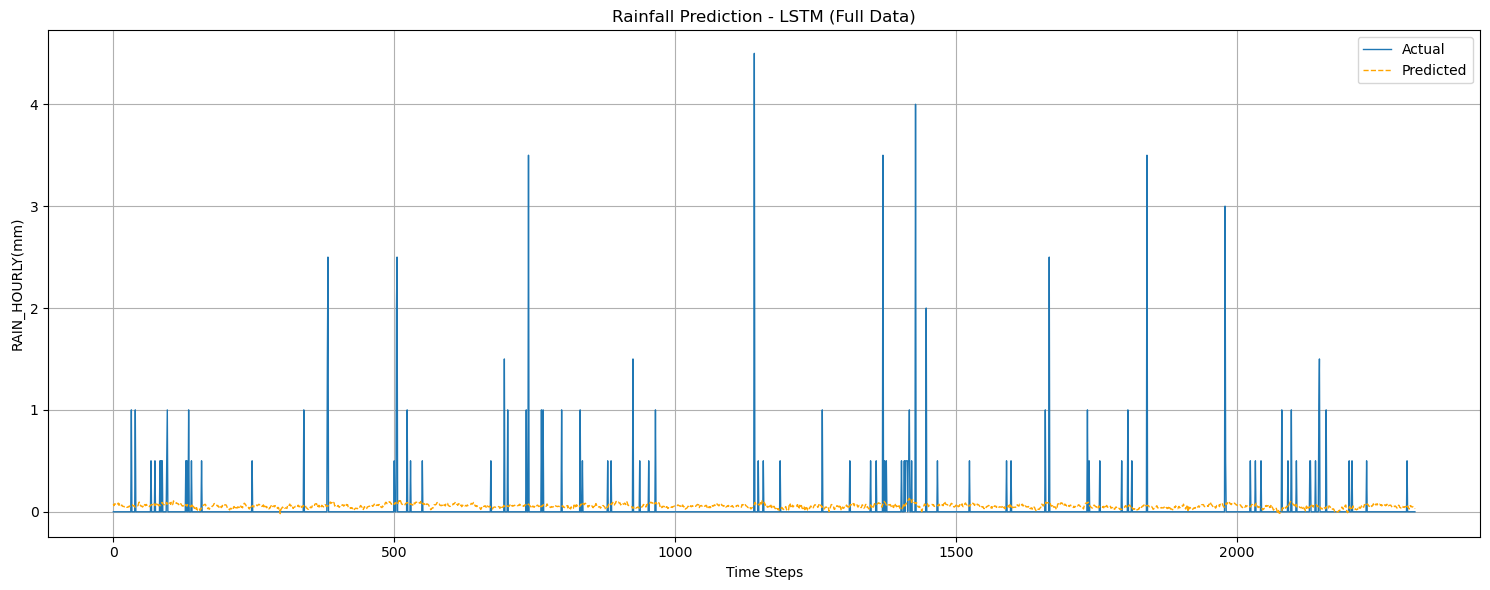

In [39]:
# Convert time column
df['TIME(UTC)'] = pd.to_datetime(df['TIME(UTC)'])

# Sort by time
df = df.sort_values(by='TIME(UTC)')

# Select features and target
features = [
    'TEMP(C)',
    'DEW_POINT(C)', 'RH(%)', 'WIND_DIR_10m(deg)', 'WIND_SPEED_10m(kt)',
    'SLP(hPa)', 'MSLP(hPa)'
]
target = 'RAIN_HOURLY(mm)'
df = df.dropna(subset=[target])

# Step 5: Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]]) 
sequence_length = 24  # past 24 hours
X_seq, y_seq = [], []

for i in range(sequence_length, len(X_scaled)):
    X_seq.append(X_scaled[i-sequence_length:i])
    y_seq.append(y_scaled[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

X_train = X_seq
y_train = y_seq

# Step 6: Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Step 8: Predict
y_pred = model.predict(X_train)

# Step 9: Inverse transform
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_train_inv = scaler_y.inverse_transform(y_train)

# Step 10: Plot
plt.figure(figsize=(15, 6))
plt.plot(y_train_inv, label='Actual', linewidth=1)
plt.plot(y_pred_inv, label='Predicted', linestyle='--', color='orange', linewidth=1)
plt.xlabel('Time Steps')
plt.ylabel('RAIN_HOURLY(mm)')
plt.title('Rainfall Prediction - LSTM (Full Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
actual = y_train_inv.flatten()
predicted = y_pred_inv.flatten()
mae = mean_absolute_error(actual,predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual,predicted)
print("evaluation metrics:")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R^2 : {r2:.3f}")


evaluation metrics:
MAE : 0.089
MSE : 0.065
RMSE : 0.255
R^2 : 0.004
